In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

#Prueba API 2013 - 2014


In [ ]:
def fetch_earthquake_data(start_date, end_date):
    url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime={start_date}&endtime={end_date}"
    data = pd.read_csv(url)
    return data

start_year = 2013
end_year = 2014

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        start_date = f"{year}-{month:02d}-01"
        end_date = f"{year}-{month:02d}-31"

        data = fetch_earthquake_data(start_date, end_date)

        # Aquí puedes realizar las operaciones o análisis que necesites con los datos obtenidos
        df = pd.DataFrame(data)

In [ ]:
df

#Iterando

In [2]:
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?"
start_year = 2018
end_year = 2023

data_list = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        start_date = f"{year}-{month:02d}-01"
        end_date = f"{year}-{month:02d}-31"
        params = {
            "format": "geojson",
            "starttime": start_date,
            "endtime": end_date,
            "limit": 20000  # Limitamos la cantidad de eventos por solicitud
        }

        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()

            for feature in data["features"]:
                properties = feature["properties"]
                magnitude = properties["mag"]
                place = properties["place"]
                date_time = pd.to_datetime(properties["time"], unit='ms')
                mag_type = properties["magType"]
                event_type = properties["type"]
                latitude = feature["geometry"]["coordinates"][1]
                longitude = feature["geometry"]["coordinates"][0]
                depth = feature["geometry"]["coordinates"][2]
                event_id = feature["id"]

                data_list.append([magnitude, place, date_time, mag_type, event_type, latitude, longitude, depth, event_id])
        else:
            print("Error en la solicitud:", response.status_code)

df = pd.DataFrame(data_list, columns=["Magnitud", "Lugar", "Fecha", "Tipo de Magnitud", "Tipo de Evento", "Latitud", "Longitud", "Profundidad", "ID"])


In [3]:
df

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,-0.20,"57 km NE of Beatty, Nevada",2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.90,nn00620165
1,1.32,"1 km SSE of Ovando, Montana",2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.73,mb80279674
2,1.10,"87 km NW of Karluk, Alaska",2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.10,ak0181e01zcs
3,0.30,"35 km SSW of Ester, Alaska",2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.30,ak0181e01urj
4,1.86,"20km SW of Primm, NV",2018-01-30 23:30:05.630,ml,earthquake,35.477500,-115.536667,0.48,ci37178436
...,...,...,...,...,...,...,...,...,...
912614,2.64,"44km WNW of Petrolia, CA",2023-06-01 00:25:31.000,md,earthquake,40.467500,-124.764167,23.56,nc73894866
912615,0.69,"6 km SSW of Volcano, Hawaii",2023-06-01 00:13:55.580,md,earthquake,19.386667,-155.247833,1.64,hv73433027
912616,1.80,"83 km NNW of Yakutat, Alaska",2023-06-01 00:08:19.505,ml,earthquake,60.269000,-140.128500,6.20,ak0236zdqifl
912617,5.10,"New Britain region, Papua New Guinea",2023-06-01 00:05:17.308,mb,earthquake,-5.769800,151.998300,35.00,us7000k5eb


In [60]:
df_copia = df.copy()

In [61]:
# los paises y los estados (USA) que se buscan filtrar
chile = ['Chile']
japon = ['Japan']
us_estados = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
             'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
             'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
             'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
             'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
             'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
             'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
             'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [62]:
# Reemplazar valores NaN con cadena vacía
df_copia['Lugar'] = df_copia['Lugar'].fillna('')

# Filtrar por países y estados
df_chile = df_copia[df_copia['Lugar'].str.contains('|'.join(chile))]
df_japan = df_copia[df_copia['Lugar'].str.contains('|'.join(japon))]
df_usa = df_copia[df_copia['Lugar'].str.contains('|'.join(us_estados))]

#**Chile**

In [63]:
df_chile

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
102,4.8,"82 km WNW of Ovalle, Chile",2018-01-30 16:34:20.100,mb,earthquake,-30.4363,-72.0405,10.000,us2000cznj
1058,4.3,"58 km WSW of Lebu, Chile",2018-01-28 03:43:31.030,mb,earthquake,-37.8829,-74.2260,10.000,us2000cqjd
1401,4.2,"78 km SW of Vallenar, Chile",2018-01-27 09:06:48.030,mb,earthquake,-29.1115,-71.2820,56.830,us2000cqb9
1474,4.4,"74 km WNW of La Ligua, Chile",2018-01-27 05:14:33.490,mb,earthquake,-32.2978,-72.0017,11.160,us2000cyu4
1741,4.9,"45 km WNW of Lebu, Chile",2018-01-26 15:26:21.020,mwr,earthquake,-37.4412,-74.1190,10.000,us2000cptq
...,...,...,...,...,...,...,...,...,...
910946,4.2,"21 km ENE of Mejillones, Chile",2023-06-04 08:45:02.714,mb,earthquake,-23.0536,-70.2456,35.000,us7000k689
910963,4.1,"20 km NNW of Vallenar, Chile",2023-06-04 07:30:42.933,mb,earthquake,-28.4172,-70.8739,67.643,us7000k67y
910982,4.7,"84 km SSE of San Pedro de Atacama, Chile",2023-06-04 06:05:25.975,mwr,earthquake,-23.5529,-67.7469,118.936,us7000k67l
911458,5.0,"80 km ESE of La Tirana, Chile",2023-06-03 10:08:33.481,mww,earthquake,-20.6574,-68.9661,135.688,us7000k62d


In [64]:
def limpiar_lugar(lugar):
    if 'of' in lugar:
        lugar = lugar.split('of')[1].strip()
    return lugar


In [65]:
df_copia_chile = df_chile.copy()

In [66]:
df_copia_chile['Lugar'] = df_copia_chile['Lugar'].apply(limpiar_lugar)

In [67]:
df_copia_chile

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
102,4.8,"Ovalle, Chile",2018-01-30 16:34:20.100,mb,earthquake,-30.4363,-72.0405,10.000,us2000cznj
1058,4.3,"Lebu, Chile",2018-01-28 03:43:31.030,mb,earthquake,-37.8829,-74.2260,10.000,us2000cqjd
1401,4.2,"Vallenar, Chile",2018-01-27 09:06:48.030,mb,earthquake,-29.1115,-71.2820,56.830,us2000cqb9
1474,4.4,"La Ligua, Chile",2018-01-27 05:14:33.490,mb,earthquake,-32.2978,-72.0017,11.160,us2000cyu4
1741,4.9,"Lebu, Chile",2018-01-26 15:26:21.020,mwr,earthquake,-37.4412,-74.1190,10.000,us2000cptq
...,...,...,...,...,...,...,...,...,...
910946,4.2,"Mejillones, Chile",2023-06-04 08:45:02.714,mb,earthquake,-23.0536,-70.2456,35.000,us7000k689
910963,4.1,"Vallenar, Chile",2023-06-04 07:30:42.933,mb,earthquake,-28.4172,-70.8739,67.643,us7000k67y
910982,4.7,"San Pedro de Atacama, Chile",2023-06-04 06:05:25.975,mwr,earthquake,-23.5529,-67.7469,118.936,us7000k67l
911458,5.0,"La Tirana, Chile",2023-06-03 10:08:33.481,mww,earthquake,-20.6574,-68.9661,135.688,us7000k62d


In [68]:
# Extraer solo las ciudades de la columna 'Lugar'
df_copia_chile['Ciudad'] = df_copia_chile['Lugar'].apply(lambda x: x.split(', ')[0])

# Eliminar la columna 'Lugar'
df_copia_chile.drop('Lugar', axis=1, inplace=True)

In [69]:
df_copia_chile

,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID,Ciudad
102,4.8,2018-01-30 16:34:20.100,mb,earthquake,-30.4363,-72.0405,10.000,us2000cznj,Ovalle
1058,4.3,2018-01-28 03:43:31.030,mb,earthquake,-37.8829,-74.2260,10.000,us2000cqjd,Lebu
1401,4.2,2018-01-27 09:06:48.030,mb,earthquake,-29.1115,-71.2820,56.830,us2000cqb9,Vallenar
1474,4.4,2018-01-27 05:14:33.490,mb,earthquake,-32.2978,-72.0017,11.160,us2000cyu4,La Ligua
1741,4.9,2018-01-26 15:26:21.020,mwr,earthquake,-37.4412,-74.1190,10.000,us2000cptq,Lebu
...,...,...,...,...,...,...,...,...,...
910946,4.2,2023-06-04 08:45:02.714,mb,earthquake,-23.0536,-70.2456,35.000,us7000k689,Mejillones
910963,4.1,2023-06-04 07:30:42.933,mb,earthquake,-28.4172,-70.8739,67.643,us7000k67y,Vallenar
910982,4.7,2023-06-04 06:05:25.975,mwr,earthquake,-23.5529,-67.7469,118.936,us7000k67l,San Pedro de Atacama
911458,5.0,2023-06-03 10:08:33.481,mww,earthquake,-20.6574,-68.9661,135.688,us7000k62d,La Tirana


In [76]:
# Agregar una nueva columna 'País' con el valor 'Chile'
df_copia_chile['País'] = 'Chile'

In [78]:
# Crear una lista con el nuevo orden de columnas
new_columns_order = ['País', 'Ciudad', 'Magnitud', 'Fecha', 'Tipo de Magnitud', 'Tipo de Evento', 'Latitud', 'Longitud', 'Profundidad', 'ID']

# Reordenar las columnas en el DataFrame
df_copia_chile = df_copia_chile[new_columns_order]

In [79]:
df_copia_chile

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
102,Chile,Ovalle,4.8,2018-01-30 16:34:20.100,mb,earthquake,-30.4363,-72.0405,10.000,us2000cznj
1058,Chile,Lebu,4.3,2018-01-28 03:43:31.030,mb,earthquake,-37.8829,-74.2260,10.000,us2000cqjd
1401,Chile,Vallenar,4.2,2018-01-27 09:06:48.030,mb,earthquake,-29.1115,-71.2820,56.830,us2000cqb9
1474,Chile,La Ligua,4.4,2018-01-27 05:14:33.490,mb,earthquake,-32.2978,-72.0017,11.160,us2000cyu4
1741,Chile,Lebu,4.9,2018-01-26 15:26:21.020,mwr,earthquake,-37.4412,-74.1190,10.000,us2000cptq
...,...,...,...,...,...,...,...,...,...,...
910946,Chile,Mejillones,4.2,2023-06-04 08:45:02.714,mb,earthquake,-23.0536,-70.2456,35.000,us7000k689
910963,Chile,Vallenar,4.1,2023-06-04 07:30:42.933,mb,earthquake,-28.4172,-70.8739,67.643,us7000k67y
910982,Chile,San Pedro de Atacama,4.7,2023-06-04 06:05:25.975,mwr,earthquake,-23.5529,-67.7469,118.936,us7000k67l
911458,Chile,La Tirana,5.0,2023-06-03 10:08:33.481,mww,earthquake,-20.6574,-68.9661,135.688,us7000k62d


<Axes: >

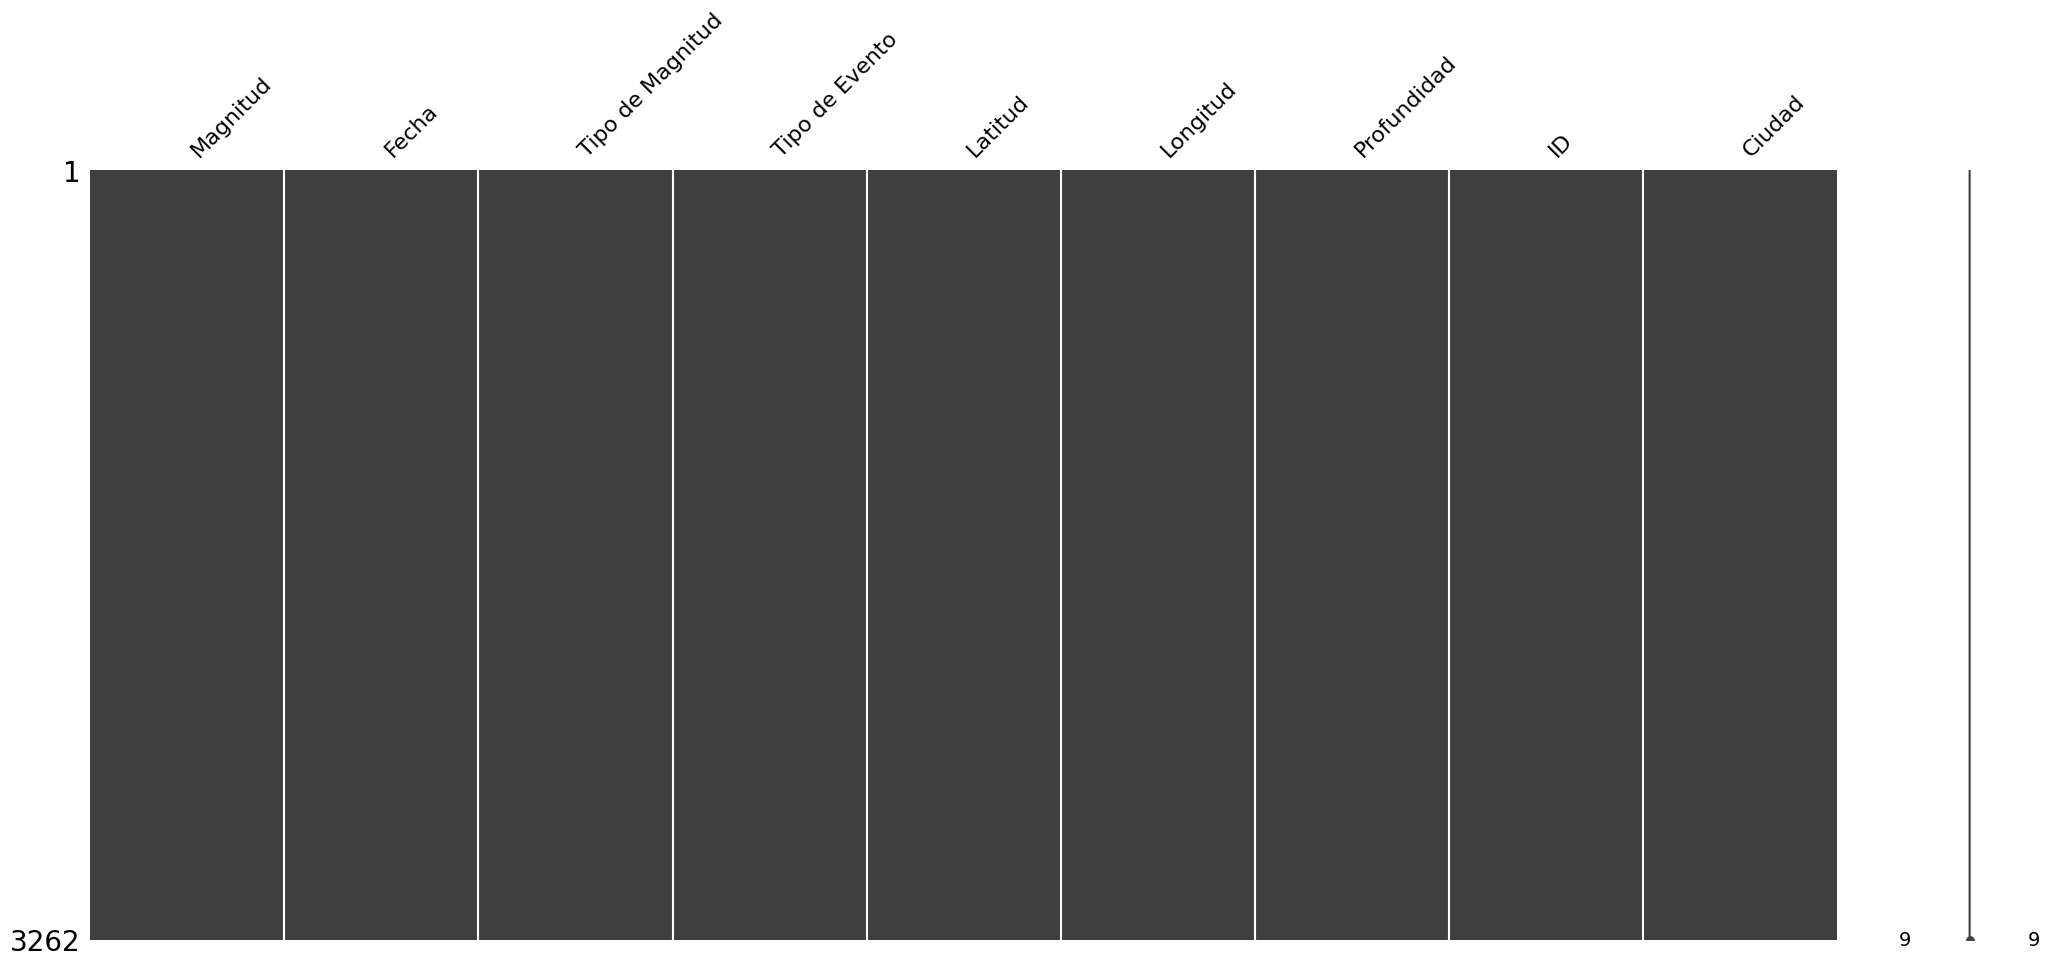

In [70]:
import missingno as msno
msno.matrix(df_copia_chile)

#**Japón**

In [ ]:
df_japan

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID,Ciudad,País
48,4.7,"38 km SSE of Shizunai-furukawach?, Japan",2018-01-30 20:11:48.110,mww,earthquake,42.0079,142.5396,60.200,us2000crgs,NaN,NaN
329,4.4,"47 km E of Ishinomaki, Japan",2018-01-30 00:25:58.290,mwr,earthquake,38.4617,141.8381,49.270,us2000cr5z,Ishinomaki,Japan
340,4.2,"86 km E of Mutsu, Japan",2018-01-29 23:42:18.920,mwr,earthquake,41.1610,142.2391,45.580,us2000cr5e,Mutsu,Japan
625,4.8,"90 km ENE of Misawa, Japan",2018-01-29 03:59:59.080,mb,earthquake,41.0220,142.3731,50.320,us2000cqua,Misawa,Japan
763,4.4,"116 km E of Hachinohe, Japan",2018-01-28 20:21:43.040,mb,earthquake,40.6007,142.8643,35.000,us2000cqqm,Hachinohe,Japan
...,...,...,...,...,...,...,...,...,...,...,...
911236,4.9,"25 km SW of Urakawa, Japan",2023-06-03 10:35:40.680,mb,earthquake,41.9746,142.5858,64.440,us7000k62j,Urakawa,Japan
911452,4.2,"73 km ESE of Katsuren-haebaru, Japan",2023-06-02 23:43:40.332,mb,earthquake,25.9991,128.5121,10.000,us7000k7ch,haebaru,Japan
911779,4.1,"21 km NW of Horokanai, Japan",2023-06-02 10:08:26.265,mb,earthquake,44.1434,141.9480,215.628,us7000k5qf,Horokanai,Japan
912152,4.5,"Izu Islands, Japan region",2023-06-01 13:28:54.061,mb,earthquake,29.2837,142.2780,10.000,us7000k5hl,NaN,NaN


In [24]:
df_copia_japan = df_japan.copy()

In [26]:
# Crear una función para limpiar la columna 'Lugar' en el caso de Japón
def limpiar_lugar_japon(lugar):
    if ' of ' in lugar:
        lugar = lugar.split(' of ')[1].split(',')[0].strip()
    elif ', Japan' in lugar:
        lugar = lugar.replace(', Japan', '')
    return lugar

In [27]:
# Aplicar la función de limpieza a la columna 'Lugar' en el DataFrame de Japón
df_copia_japan['Lugar'] = df_copia_japan['Lugar'].apply(limpiar_lugar_japon)

In [28]:
df_copia_japan

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
48,4.7,Shizunai-furukawach?,2018-01-30 20:11:48.110,mww,earthquake,42.0079,142.5396,60.200,us2000crgs
329,4.4,Ishinomaki,2018-01-30 00:25:58.290,mwr,earthquake,38.4617,141.8381,49.270,us2000cr5z
340,4.2,Mutsu,2018-01-29 23:42:18.920,mwr,earthquake,41.1610,142.2391,45.580,us2000cr5e
625,4.8,Misawa,2018-01-29 03:59:59.080,mb,earthquake,41.0220,142.3731,50.320,us2000cqua
763,4.4,Hachinohe,2018-01-28 20:21:43.040,mb,earthquake,40.6007,142.8643,35.000,us2000cqqm
...,...,...,...,...,...,...,...,...,...
911451,4.9,Urakawa,2023-06-03 10:35:40.680,mb,earthquake,41.9746,142.5858,64.440,us7000k62j
911668,4.2,Katsuren-haebaru,2023-06-02 23:43:40.332,mb,earthquake,25.9991,128.5121,10.000,us7000k7ch
911995,4.1,Horokanai,2023-06-02 10:08:26.265,mb,earthquake,44.1434,141.9480,215.628,us7000k5qf
912368,4.5,Izu Islands region,2023-06-01 13:28:54.061,mb,earthquake,29.2837,142.2780,10.000,us7000k5hl


In [46]:
# Cambiar el nombre de la columna 'Lugar' a 'Ciudad'
df_copia_japan.rename(columns={'Lugar': 'Ciudad'}, inplace=True)

# Agregar una nueva columna 'País' con el valor 'Japón'
df_copia_japan['País'] = 'Japón'

In [49]:
# Crear una lista con el nuevo orden de columnas
new_columns_order = ['País', 'Ciudad', 'Magnitud', 'Fecha', 'Tipo de Magnitud', 'Tipo de Evento', 'Latitud', 'Longitud', 'Profundidad', 'ID']

# Reordenar las columnas en el DataFrame
df_copia_japan = df_copia_japan[new_columns_order]


In [50]:
df_copia_japan

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
48,Japón,Shizunai-furukawach?,4.7,2018-01-30 20:11:48.110,mww,earthquake,42.0079,142.5396,60.200,us2000crgs
329,Japón,Ishinomaki,4.4,2018-01-30 00:25:58.290,mwr,earthquake,38.4617,141.8381,49.270,us2000cr5z
340,Japón,Mutsu,4.2,2018-01-29 23:42:18.920,mwr,earthquake,41.1610,142.2391,45.580,us2000cr5e
625,Japón,Misawa,4.8,2018-01-29 03:59:59.080,mb,earthquake,41.0220,142.3731,50.320,us2000cqua
763,Japón,Hachinohe,4.4,2018-01-28 20:21:43.040,mb,earthquake,40.6007,142.8643,35.000,us2000cqqm
...,...,...,...,...,...,...,...,...,...,...
911451,Japón,Urakawa,4.9,2023-06-03 10:35:40.680,mb,earthquake,41.9746,142.5858,64.440,us7000k62j
911668,Japón,Katsuren-haebaru,4.2,2023-06-02 23:43:40.332,mb,earthquake,25.9991,128.5121,10.000,us7000k7ch
911995,Japón,Horokanai,4.1,2023-06-02 10:08:26.265,mb,earthquake,44.1434,141.9480,215.628,us7000k5qf
912368,Japón,Izu Islands region,4.5,2023-06-01 13:28:54.061,mb,earthquake,29.2837,142.2780,10.000,us7000k5hl


In [ ]:
msno.matrix(df_copia_japan)

#**Estados Unidos**

In [33]:
df_usa

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,-0.20,"57 km NE of Beatty, Nevada",2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.90,nn00620165
1,1.32,"1 km SSE of Ovando, Montana",2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.73,mb80279674
2,1.10,"87 km NW of Karluk, Alaska",2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.10,ak0181e01zcs
3,0.30,"35 km SSW of Ester, Alaska",2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.30,ak0181e01urj
5,1.40,"44 km W of Cohoe, Alaska",2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.00,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...
912607,1.45,"10 km ENE of Pāhala, Hawaii",2023-06-01 01:05:21.780,md,earthquake,19.239667,-155.381667,30.39,hv73433092
912609,-0.40,"39 km WNW of Indian Springs, Nevada",2023-06-01 01:01:49.341,ml,earthquake,36.708800,-116.072100,5.60,nn00860607
912610,1.60,"22 km WNW of Nikiski, Alaska",2023-06-01 00:55:49.517,ml,earthquake,60.795100,-151.637700,73.90,ak0236ze0n6j
912615,0.69,"6 km SSW of Volcano, Hawaii",2023-06-01 00:13:55.580,md,earthquake,19.386667,-155.247833,1.64,hv73433027


In [38]:
df_copia_usa = df_usa.copy()

In [40]:
# Crear una función para extraer el estado de Estados Unidos del lugar
def extraer_estado(lugar):
    estados = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
               'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
               'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
               'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
               'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
               'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

    for estado in estados:
        if estado in lugar:
            return estado

    return lugar

In [41]:
# Aplicar la función para extraer el estado a la columna 'Lugar' en el DataFrame de Estados Unidos
df_copia_usa['Lugar'] = df_copia_usa['Lugar'].apply(extraer_estado)

In [42]:
df_copia_usa

,Magnitud,Lugar,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,-0.20,Nevada,2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.90,nn00620165
1,1.32,Montana,2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.73,mb80279674
2,1.10,Alaska,2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.10,ak0181e01zcs
3,0.30,Alaska,2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.30,ak0181e01urj
5,1.40,Alaska,2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.00,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...
912607,1.45,Hawaii,2023-06-01 01:05:21.780,md,earthquake,19.239667,-155.381667,30.39,hv73433092
912609,-0.40,Nevada,2023-06-01 01:01:49.341,ml,earthquake,36.708800,-116.072100,5.60,nn00860607
912610,1.60,Alaska,2023-06-01 00:55:49.517,ml,earthquake,60.795100,-151.637700,73.90,ak0236ze0n6j
912615,0.69,Hawaii,2023-06-01 00:13:55.580,md,earthquake,19.386667,-155.247833,1.64,hv73433027


In [44]:
# Cambiar el nombre de la columna 'Lugar' a 'Ciudad'
df_copia_usa.rename(columns={'Lugar': 'Ciudad'}, inplace=True)

# Agregar una nueva columna 'País' con el valor 'Estados Unidos'
df_copia_usa['País'] = 'Estados Unidos'

In [51]:
# Crear una lista con el nuevo orden de columnas
new_columns_order = ['País', 'Ciudad', 'Magnitud', 'Fecha', 'Tipo de Magnitud', 'Tipo de Evento', 'Latitud', 'Longitud', 'Profundidad', 'ID']

# Reordenar las columnas en el DataFrame
df_copia_usa = df_copia_usa[new_columns_order]

In [53]:
df_copia_usa

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,Estados Unidos,Nevada,-0.20,2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.90,nn00620165
1,Estados Unidos,Montana,1.32,2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.73,mb80279674
2,Estados Unidos,Alaska,1.10,2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.10,ak0181e01zcs
3,Estados Unidos,Alaska,0.30,2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.30,ak0181e01urj
5,Estados Unidos,Alaska,1.40,2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.00,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...,...
912607,Estados Unidos,Hawaii,1.45,2023-06-01 01:05:21.780,md,earthquake,19.239667,-155.381667,30.39,hv73433092
912609,Estados Unidos,Nevada,-0.40,2023-06-01 01:01:49.341,ml,earthquake,36.708800,-116.072100,5.60,nn00860607
912610,Estados Unidos,Alaska,1.60,2023-06-01 00:55:49.517,ml,earthquake,60.795100,-151.637700,73.90,ak0236ze0n6j
912615,Estados Unidos,Hawaii,0.69,2023-06-01 00:13:55.580,md,earthquake,19.386667,-155.247833,1.64,hv73433027


<Axes: >

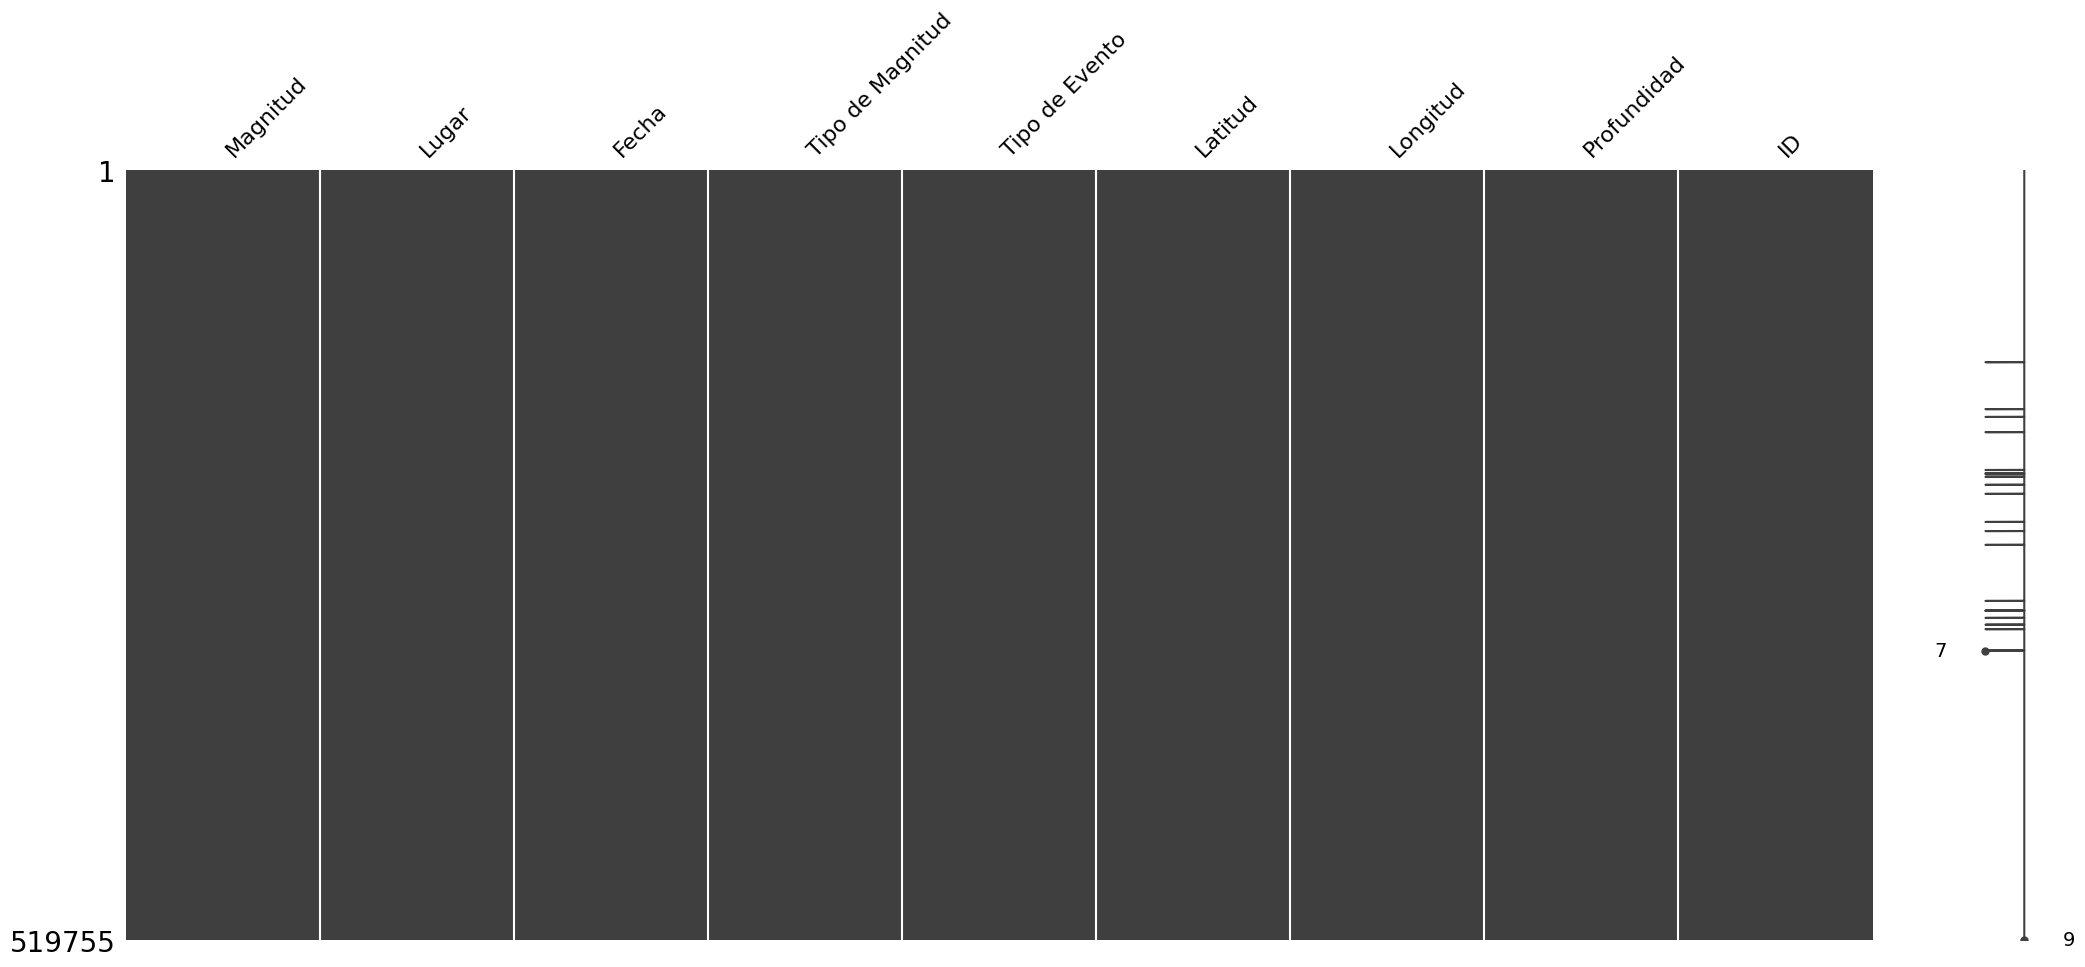

In [43]:
msno.matrix(df_copia_usa)

#**Unir Dataframe**

In [80]:
# Concatenar los DataFrames
df_combined = pd.concat([df_copia_usa, df_copia_japan, df_copia_chile])

# Reiniciar los índices del DataFrame resultante
df_combined = df_combined.reset_index(drop=True)

In [104]:
df_combined

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,Estados Unidos,Nevada,-0.20,2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.900,nn00620165
1,Estados Unidos,Montana,1.32,2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.730,mb80279674
2,Estados Unidos,Alaska,1.10,2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.100,ak0181e01zcs
3,Estados Unidos,Alaska,0.30,2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.300,ak0181e01urj
4,Estados Unidos,Alaska,1.40,2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.000,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...,...
528684,Chile,Mejillones,4.20,2023-06-04 08:45:02.714,mb,earthquake,-23.053600,-70.245600,35.000,us7000k689
528685,Chile,Vallenar,4.10,2023-06-04 07:30:42.933,mb,earthquake,-28.417200,-70.873900,67.643,us7000k67y
528686,Chile,San Pedro de Atacama,4.70,2023-06-04 06:05:25.975,mwr,earthquake,-23.552900,-67.746900,118.936,us7000k67l
528687,Chile,La Tirana,5.00,2023-06-03 10:08:33.481,mww,earthquake,-20.657400,-68.966100,135.688,us7000k62d


In [105]:
unique_event_types = df_combined['Tipo de Evento'].unique()
print("Valores únicos en 'Tipo de Evento':")
print(unique_event_types)

Valores únicos en 'Tipo de Evento':
['earthquake' 'explosion' 'quarry blast' 'mining explosion' 'ice quake'
 'meteorite' 'other event' 'volcanic eruption' 'chemical explosion'
 'rock burst' 'mine collapse' 'Ice Quake' 'experimental explosion'
 'not reported' 'snow avalanche']


In [106]:
df_earthquakes = df_combined[df_combined['Tipo de Evento'] == 'earthquake']

In [107]:
df_earthquakes

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,Estados Unidos,Nevada,-0.20,2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.900,nn00620165
1,Estados Unidos,Montana,1.32,2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.730,mb80279674
2,Estados Unidos,Alaska,1.10,2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.100,ak0181e01zcs
3,Estados Unidos,Alaska,0.30,2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.300,ak0181e01urj
4,Estados Unidos,Alaska,1.40,2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.000,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...,...
528684,Chile,Mejillones,4.20,2023-06-04 08:45:02.714,mb,earthquake,-23.053600,-70.245600,35.000,us7000k689
528685,Chile,Vallenar,4.10,2023-06-04 07:30:42.933,mb,earthquake,-28.417200,-70.873900,67.643,us7000k67y
528686,Chile,San Pedro de Atacama,4.70,2023-06-04 06:05:25.975,mwr,earthquake,-23.552900,-67.746900,118.936,us7000k67l
528687,Chile,La Tirana,5.00,2023-06-03 10:08:33.481,mww,earthquake,-20.657400,-68.966100,135.688,us7000k62d


In [109]:
df_earthquakes

,País,Ciudad,Magnitud,Fecha,Tipo de Magnitud,Tipo de Evento,Latitud,Longitud,Profundidad,ID
0,Estados Unidos,Nevada,-0.20,2018-01-30 23:58:30.993,ml,earthquake,37.300800,-116.338500,7.900,nn00620165
1,Estados Unidos,Montana,1.32,2018-01-30 23:57:15.760,ml,earthquake,47.004833,-113.121667,10.730,mb80279674
2,Estados Unidos,Alaska,1.10,2018-01-30 23:40:12.765,ml,earthquake,58.201000,-155.329600,2.100,ak0181e01zcs
3,Estados Unidos,Alaska,0.30,2018-01-30 23:39:53.278,ml,earthquake,64.543200,-148.252300,9.300,ak0181e01urj
4,Estados Unidos,Alaska,1.40,2018-01-30 23:27:51.891,ml,earthquake,60.436700,-152.102800,86.000,ak0181dzza2d
...,...,...,...,...,...,...,...,...,...,...
528684,Chile,Mejillones,4.20,2023-06-04 08:45:02.714,mb,earthquake,-23.053600,-70.245600,35.000,us7000k689
528685,Chile,Vallenar,4.10,2023-06-04 07:30:42.933,mb,earthquake,-28.417200,-70.873900,67.643,us7000k67y
528686,Chile,San Pedro de Atacama,4.70,2023-06-04 06:05:25.975,mwr,earthquake,-23.552900,-67.746900,118.936,us7000k67l
528687,Chile,La Tirana,5.00,2023-06-03 10:08:33.481,mww,earthquake,-20.657400,-68.966100,135.688,us7000k62d
